<Figure size 640x480 with 0 Axes>

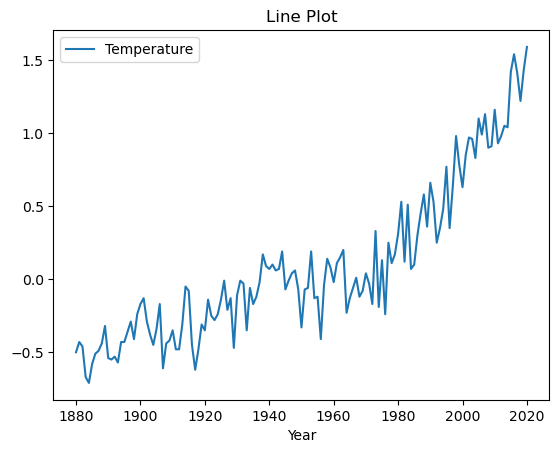

<Figure size 640x480 with 0 Axes>

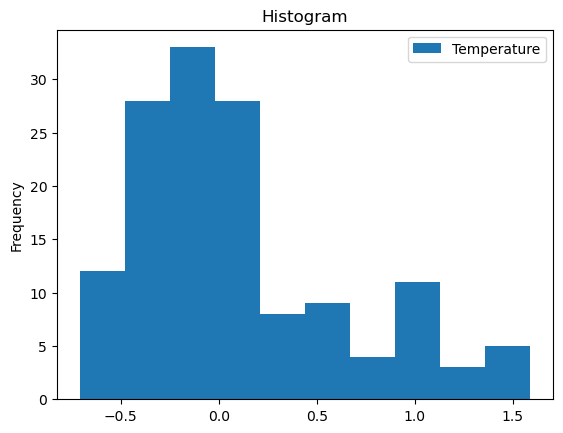

<Figure size 640x480 with 0 Axes>

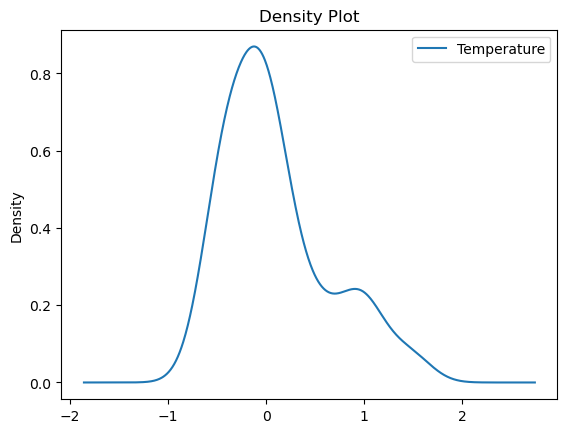

<Figure size 640x480 with 0 Axes>

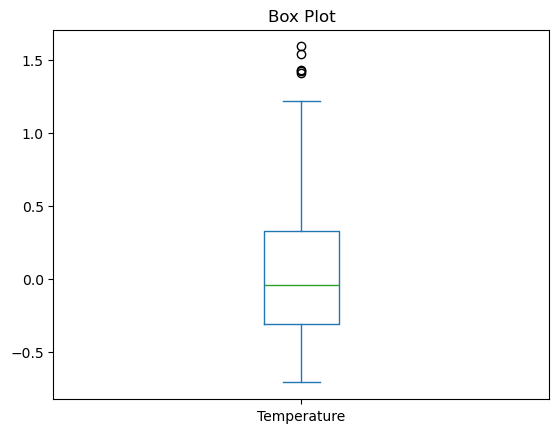

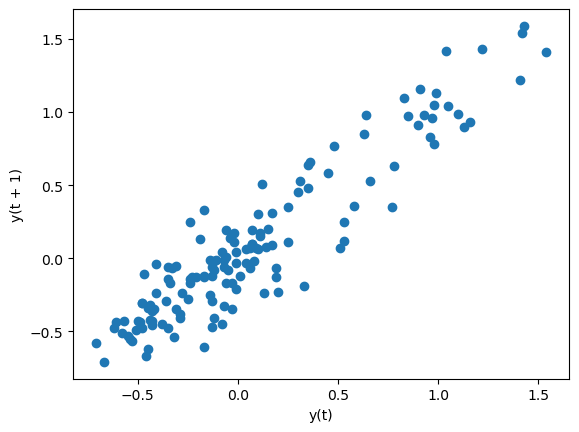

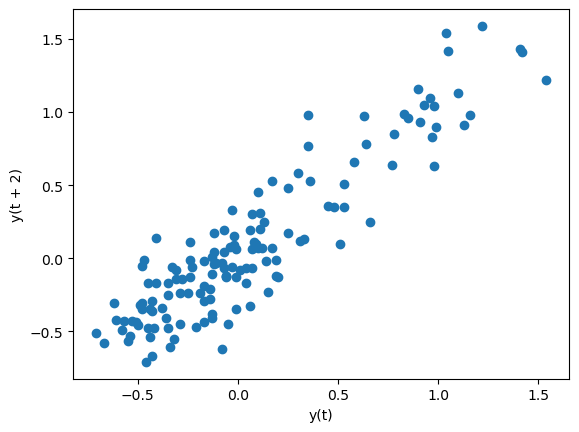

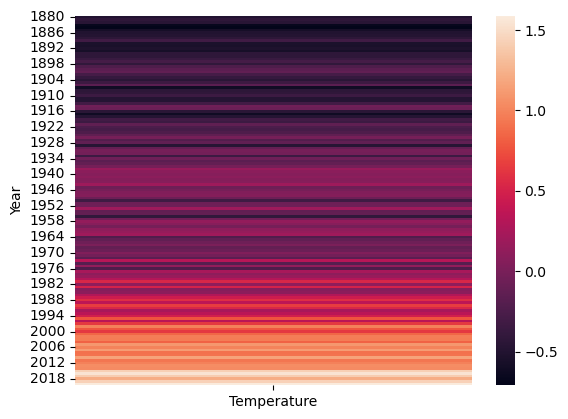

In [132]:
#3.3.1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

def generate_plots(plot_filename_base, series):
    
    # Line plot
    plt.figure()
    series.plot.line(title="Line Plot")
    plt.savefig(f'plots/{plot_filename_base}_line.png')

    # Histogram
    plt.figure()
    series.plot.hist(title="Histogram")
    plt.savefig(f'plots/{plot_filename_base}_hist.png')

    # Density plot
    plt.figure()
    series.plot.density(title="Density Plot")
    plt.savefig(f'plots/{plot_filename_base}_density.png')

    # Box plot
    plt.figure()
    series.plot.box(title="Box Plot")
    plt.savefig(f'plots/{plot_filename_base}_box.png')

    # Lag-1 plot
    plt.figure()
    pd.plotting.lag_plot(series, lag=1)
    plt.savefig(f'plots/{plot_filename_base}_lag1.png')

    # Lag-2 plot
    plt.figure()
    pd.plotting.lag_plot(series, lag=2)
    plt.savefig(f'plots/{plot_filename_base}_lag2.png')

    # HeatMap
    plt.figure()
    sns.heatmap(series)
    plt.savefig(f'plots/{plot_filename_base}_heatmap.png')

    return

#3.2.2
# Load the CSV file into a DataFrame
df = pd.read_excel("global-land-temperature-anomalies-1880-2020.xlsx", 'Data')
series= df.iloc[4:145, 1:3]
series = series.bfill()
series.columns = ['Year', 'Temperature']
#series['Year'] = pd.to_datetime(series['Year'])
series['Year'] = pd.to_numeric(series['Year'])
series.set_index('Year', inplace=True)

generate_plots("Temp Anomaly", series)
    

Original p_value =  0.9935702498622588


TypeError: 'str' object is not callable

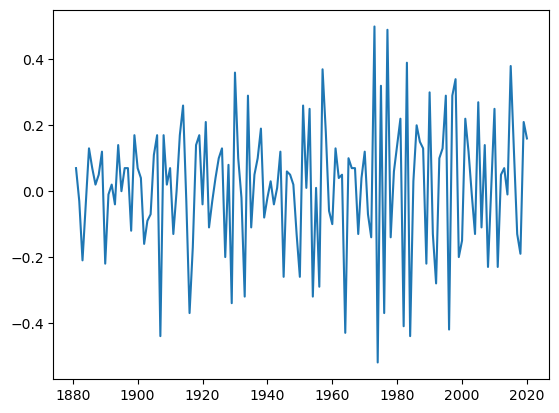

In [138]:
from statsmodels.tsa.stattools import adfuller

# ADF test to check if data is stationary
# p should be < 0.05 is stationary
result_adf = adfuller(series, autolag='AIC')
p_value = result_adf[1]
print("Original p_value = ", p_value)


#Linear trend detected. order-1 differencing applied to remove trend
series_diff = series.diff().dropna()

# Plot data for visual inspection
plt.figure()
plt.savefig('plots/TempAnomaly_Diff1.png')
plt.plot(series_diff)
plt.title("Time series Diff order 1")


# ADF test to check if data is stationary
# p should be < 0.05 is stationary
result_adf = adfuller(series_diff, autolag='AIC')
p_value = result_adf[1]
print("Diff 1 p_value = ", p_value)

TypeError: 'str' object is not callable

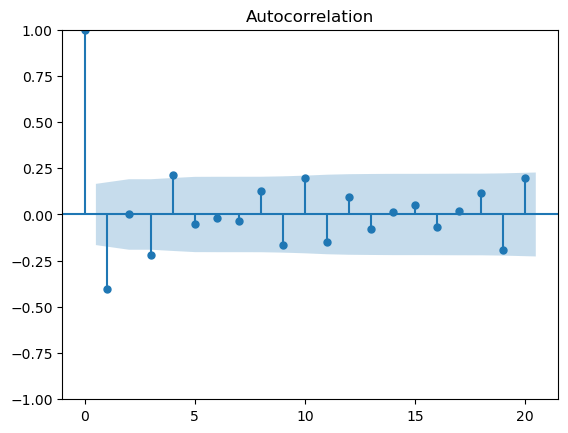

In [139]:
# Feature Extraction
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF graphs to determine p,q values
plot_acf(series_diff, lags=20)
plt.title('ACF')
plt.savefig('plots/TempAnomaly_ACF.png')
plt.show()

plot_pacf(series_diff, lags=20)
plt.title('PACF')
plt.savefig('plots/TempAnomaly_PACF.png')
plt.show()

# Show data characteristics
print('Mean: ', series_diff.mean())
print('Variance: ', series_diff.var())
print('Standard deviation: ', series_diff.std())

In [53]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

#model = auto_arima(series_diff, d=1, seasonal=False, information_criterion='aic')
#model.summary()

model = ARIMA(series, order=(2, 1, 4)).fit()
model.summary()


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Temperature   No. Observations:                  141
Model:                 ARIMA(2, 1, 4)   Log Likelihood                  51.475
Date:                Wed, 22 May 2024   AIC                            -88.950
Time:                        01:34:38   BIC                            -68.358
Sample:                             0   HQIC                           -80.582
                                - 141                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4070      0.350     -1.163      0.245      -1.093       0.279
ar.L2         -0.3084      0.301     -1.025      0.305      -0.898       0.281
ma.L1         -0.1399      0.354     -0.396      0.692      -0.833       0.553
ma.L2          0.0235      0.229      0.102      0.918      -0.426       0.473
ma.L3         -0.3752      0.165     -2.275      0.023      -0.698      -0.052
ma.L4          0.2028      0.137      1.475      0.140      -0.067       0.472
sigma2         0.0279      0.003      8.030      0.000       0.021       0.035
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.62   Prob(JB):                         0.90
Heteroskedasticity (H):               2.15   Skew:                            -0.09
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

TypeError: 'str' object is not callable

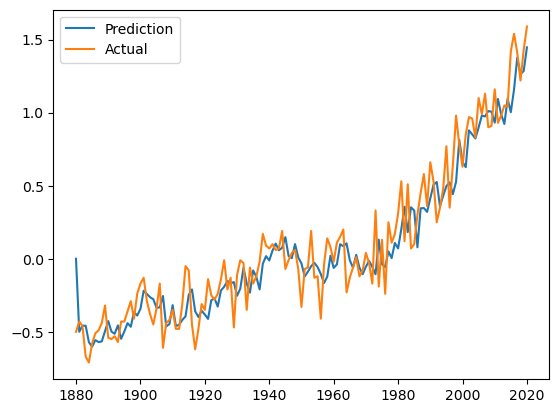

In [140]:
# Prediction
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

prediction = model.predict(start=0, end = len(series)-1)
plt.figure()
plt.plot(prediction, label='Prediction')
plt.plot(series, label="Actual")
plt.legend()
plt.title("In Sample Prediction")
plt.savefig('plots/TempAnomaly_InSample_Prediction.png')
plt.show()

residuals = model.resid
# perform Ljung-Box test on residuals with lag=1 to check if random
result_lb = sm.stats.acorr_ljungbox(residuals, lags=[1], return_df=True)
print('p-value: ',result_lb)
print("Ljung-Box test: p value is > 0.05. Thus the data is random\n")



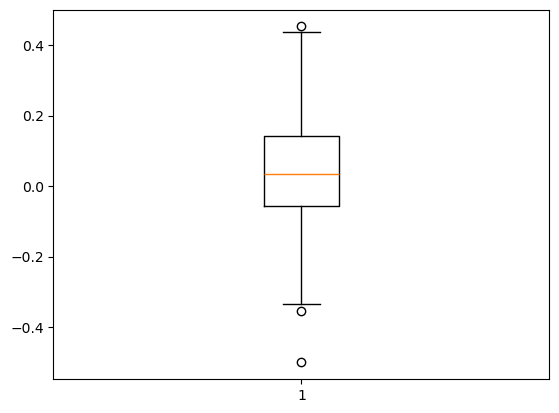

Outliers 
    Year         0
0  1880 -0.500000
1  1907 -0.355243
2  1998  0.452661


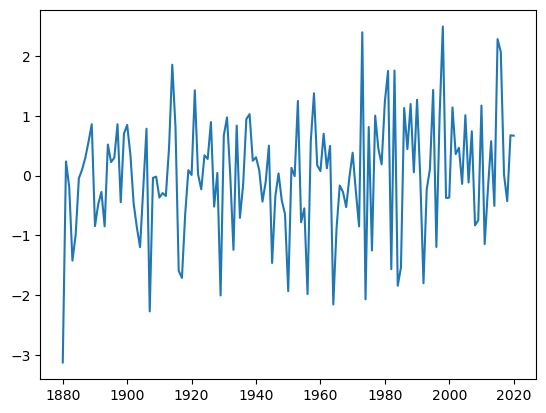

Anomalies: 
 Year
1880   -3.129454
1907   -2.274380
1929   -2.007329
1964   -2.157894
1973    2.400043
1974   -2.071308
1998    2.497875
2015    2.286010
2016    2.072891
dtype: float64


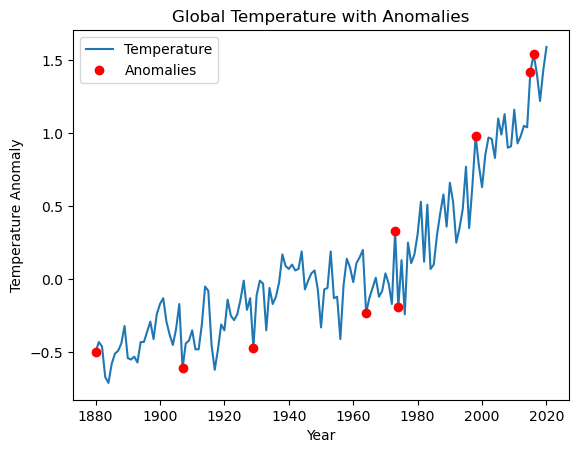

In [153]:
from pandas import Series

# Anomaly Detection

def box_plot_outlier(data):

    # Calculate quartiles and IQR
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    iqr = q3 - q1

    # Find outliers using IQR method
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

def z_score(data):
    # Calculate Z-score for each data point
    return (data - np.mean(data)) / np.std(data)

def find_anomalies(series, title="plot", filename="Anomaly"):

    #Box plot
    plt.figure()
    plt.boxplot(series)
    plt.title = title
    plt.savefig(f'plots/{filename}_BoxPlot.png')
    plt.show()

    # Print Outliers
    outliers = box_plot_outlier(series)
    print("Outliers \n",series[series.isin(outliers)].reset_index())

    # Plot zscores
    zscore = z_score(series)
    plt.figure()
    plt.plot(zscore)
    plt.title = title
    plt.savefig(f'plots/{filename}_ZScore.png')
    plt.show()

    # Anomalies
    anomalies = zscore[zscore.abs() > 2]    # 98% Anomaly Threshold
    print("Anomalies: \n",anomalies)
    return anomalies

anomalies = find_anomalies(residuals, "Global Temp Residual Series", "GlobalTempResid_Series")

# Plot series with anomalies marked
series.plot.line(title="Global Temperature with Anomalies")
plt.plot(anomalies.index, series.loc[anomalies.index], 'ro', label = "Anomalies")
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.savefig(f"plots/GlobTemp_with_Anomalies.png")
plt.show()


TypeError: 'str' object is not callable

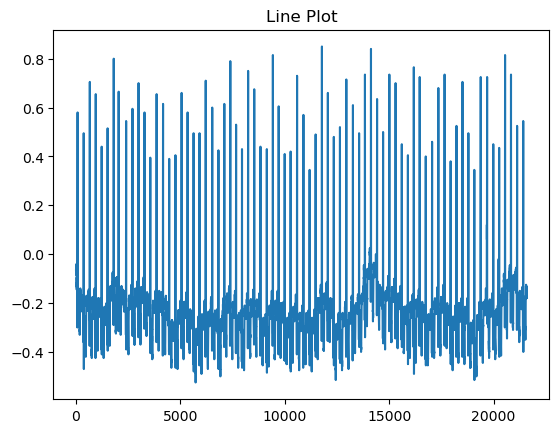

<Figure size 640x480 with 0 Axes>

In [174]:
#3.3.2

def generate_plots(series, plot_filename_base):
    
    # Line plot
    plt.figure()
    series.plot.line(title="Line Plot")
    plt.savefig(f'plots/{plot_filename_base}_line.png')

    # Lag-1 plot
    plt.figure()
    plt.title("Lag-1 Plot")
    pd.plotting.lag_plot(series, lag=1)
    plt.savefig(f'plots/{plot_filename_base}_lag1.png')

    # Lag-2 plot
    plt.figure()
    plt.title("Lag-2 Plot")
    pd.plotting.lag_plot(series, lag=2)
    plt.savefig(f'plots/{plot_filename_base}_lag2.png')

    return

# Load csv
df = pd.read_csv('100.csv', skiprows=[1], index_col=["'Elapsed time'"])
series_mlii = pd.Series(df["'MLII'"].values, dtype=float)
series_v5 = pd.Series(df["'V5'"].values, dtype=float)

# Exploratory Data Analysis
generate_plots(series_v5, "ECG_V5")
generate_plots(series_mlii, "ECG_MLII")



In [92]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential

def split_data(series, input_window, output_window, training_percent):

    input_seq = []
    output_seq = []

    # Separate series into input and output series based onrequired steps
    for i in range(len(series) - input_window - output_window + 1):
        input_seq.append(series[i:i + input_window])
        output_seq.append(series[i + input_window:i + input_window + output_window])

    input_seq = np.array(input_seq)
    output_seq = np.array(output_seq)

    # Split data into 80% for training, 20% for predication
    split_index = round(len(input_seq)*training_percent)
    # training data
    input_train = input_seq[:split_index]
    output_train = output_seq[:split_index]
    # testing data
    input_predict = input_seq[split_index:]
    output_predict = output_seq[split_index:]

    return [input_train, output_train], [input_predict, output_predict]

#define an LSTM model to be trained
def create_LSTM(input_train, output_train, window_size_in, window_size_out, epochs = 1):

    num_neurons = 64

    # Create LSTM model
    model = Sequential()
    model.add(LSTM(num_neurons,activation="relu",input_shape=(window_size_in,window_size_out)))    # Input layer
    #model.add(Dense(32))
    #model.add(Dense(16))
    model.add(Dense(window_size_out))  # Output layer, no activation for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(input_train, output_train, epochs=epochs, batch_size=32)

#    model.summary()
    return model


Epoch 1/50


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0223
Epoch 2/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.2835e-04
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.8346e-04
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.7216e-04
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.9436e-04
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.9393e-04
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.4803e-04
Epoch 8/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.1828e-04
Epoch 9/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.7638e-04
Epoch 10/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.7368e-04
Epoch 11/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.7213e-04
Epoch 12/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.5971e-04
Epoch 13/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.5459e-04
Epoch 14/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.3405e-04
Epoch 15/50
540/

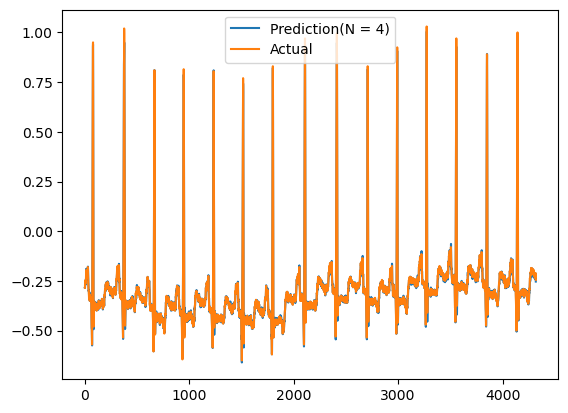

LSTM - Input Vector (N = 4)
R2 =  0.9935899277678779
MAE =  0.010014327852351712
MSE =  0.00019640979024744898
MAPE =  0.03713678718302161
Anomalies: 
 [  70  367  375  376  933 1501 2099 2105 2410 2413 2705 2983 3266 3267
 3271 3275 3550 3551 3554 3843 3852 4135]
70     -0.440
367    -0.395
375     0.970
376     1.020
933    -0.610
1501   -0.585
2099   -0.485
2105    0.640
2410    0.690
2413    0.995
2705    0.205
2983   -0.450
3266   -0.380
3267   -0.235
3271    0.670
3275    0.755
3550   -0.295
3551   -0.130
3554    0.530
3843   -0.375
3852    0.750
4135   -0.340
dtype: float64


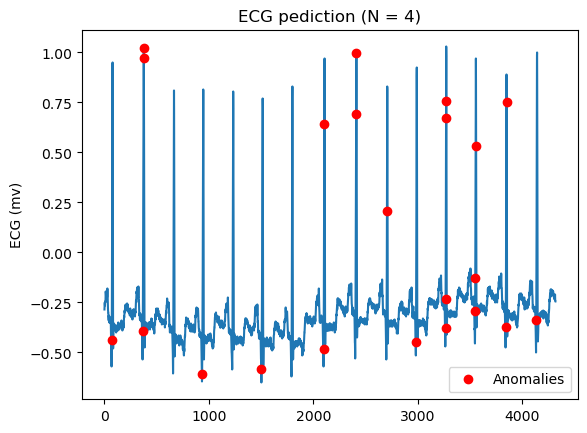

Epoch 1/50


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0226
Epoch 2/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.7040e-04
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7.1904e-04
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.5109e-04
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.2971e-04
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.3659e-04
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.2793e-04
Epoch 8/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.9564e-04
Epoch 9/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.8844e-04
Epoch 10/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.5062e-04
Epoch 11/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.5369e-04
Epoch 12/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.4454e-04
Epoch 13/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.2935e-04
Epoch 14/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.2566e-04
Epoch 15/50
540/

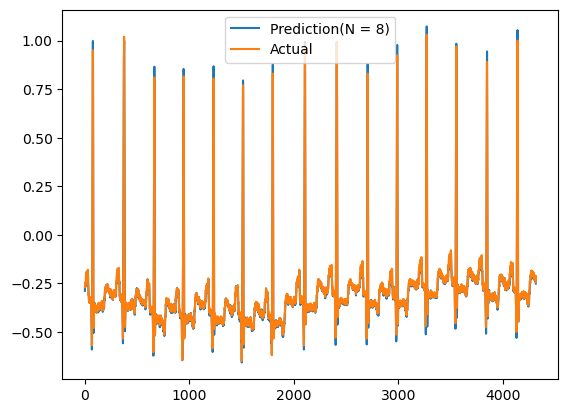

LSTM - Input Vector (N = 8)
R2 =  0.9944131602599092
MAE =  0.009874427513137026
MSE =  0.00018699651724261973
MAPE =  0.034919125041071745
Anomalies: 
 [  78  666  947 1232 1516 1800 2108 2401 2413 2982 2991 3264 3265 3266
 3273 3278 3548 3549 3557 3842 3850 4133]
78      0.740
666     0.715
947     0.630
1232    0.805
1516    0.490
1800    0.685
2108    0.790
2401   -0.505
2413    0.880
2982   -0.450
2991    0.760
3264   -0.450
3265   -0.380
3266   -0.235
3273    0.980
3278   -0.410
3548   -0.410
3549   -0.295
3557    0.855
3842   -0.375
3850    0.885
4133   -0.445
dtype: float64


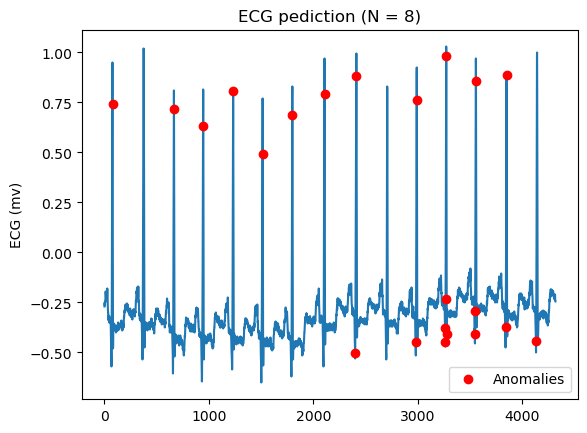

Epoch 1/50


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0257
Epoch 2/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 9.7769e-04
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 6.5912e-04
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 5.6415e-04
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4.7858e-04
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 4.0500e-04
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 4.0699e-04
Epoch 8/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3.9563e-04
Epoch 9/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3.2348e-04
Epoch 10/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2.8572e-04
Epoch 11/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2.7590e-04
Epoch 12/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 2.4107e-04
Epoch 13/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.2943e-04
Epoch 14/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.1902e-04
Epoch 15/50
540/

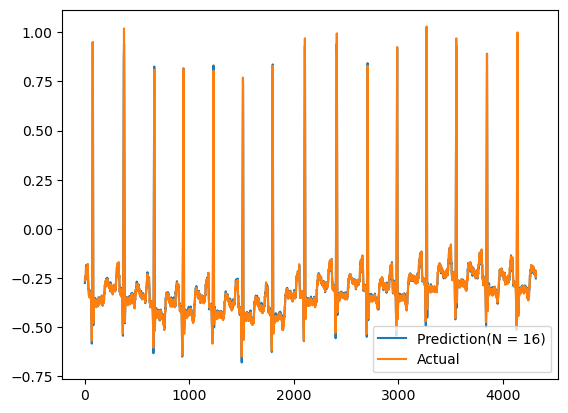

LSTM - Input Vector (N = 16)
R2 =  0.9951008974916696
MAE =  0.008921815669174847
MSE =  0.00015230097019195988
MAPE =  0.03205967022676271
Anomalies: 
 [ 373  374  375  656  938 1224 1505 2400 2408 2411 2981 2992 3264 3265
 3273 3548 3549 3838 3841 3850 4132 4144]
373     0.970
374     1.020
375     0.995
656    -0.565
938    -0.230
1224   -0.415
1505   -0.340
2400   -0.505
2408    0.690
2411    0.995
2981   -0.450
2992    0.035
3264   -0.380
3265   -0.235
3273    0.755
3548   -0.295
3549   -0.130
3838   -0.465
3841   -0.375
3850    0.750
4132   -0.445
4144    0.195
dtype: float64


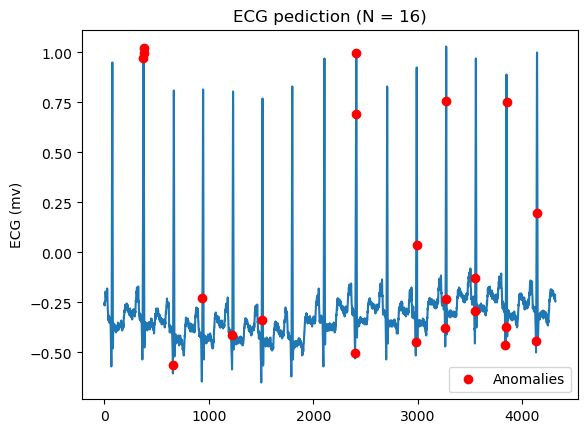

Epoch 1/50


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0113
Epoch 2/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.4625e-04
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6.1203e-04
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.7782e-04
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.6909e-04
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.4917e-04
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2590e-04
Epoch 8/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.3434e-04
Epoch 9/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.0743e-04
Epoch 10/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8101e-04
Epoch 11/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5865e-04
Epoch 12/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5521e-04
Epoch 13/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5234e-04
Epoch 14/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.2826e-04
Epoch 15/50
540/

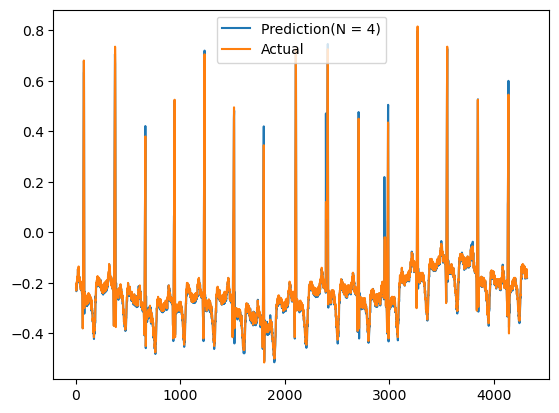

LSTM - Input Vector (N = 4)
R2 =  0.9843085394948045
MAE =  0.010732605821502846
MSE =  0.0002994726725697817
MAPE =  0.053801033613324
Anomalies: 
 [ 364  366  665  671 1222 1514 1520 1798 1799 2392 2393 2404 2698 2952
 2953 2963 2989 3263 3272 3547 3840 4132]
364    -0.265
366    -0.010
665     0.240
671    -0.340
1222   -0.330
1514    0.395
1520   -0.305
1798    0.345
1799    0.170
2392    0.120
2393    0.120
2404    0.150
2698   -0.315
2952   -0.020
2953   -0.020
2963   -0.260
2989    0.430
3263   -0.205
3272    0.720
3547   -0.085
3840   -0.185
4132   -0.215
dtype: float64


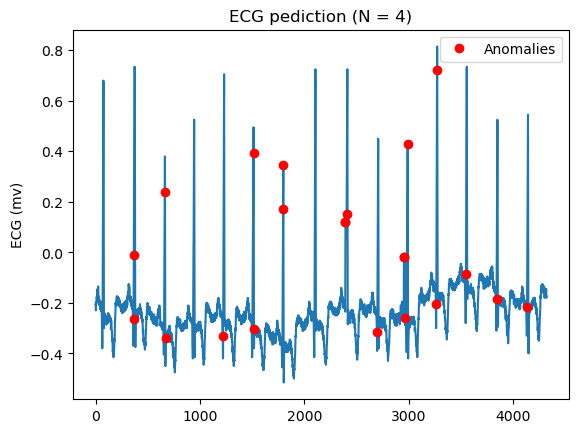

Epoch 1/50


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0089
Epoch 2/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.9267e-04
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5.9725e-04
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.2375e-04
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.6615e-04
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.2826e-04
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.0924e-04
Epoch 8/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.8454e-04
Epoch 9/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.0790e-04
Epoch 10/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.8166e-04
Epoch 11/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.7703e-04
Epoch 12/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.7223e-04
Epoch 13/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.6908e-04
Epoch 14/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.6394e-04
Epoch 15/50
540/

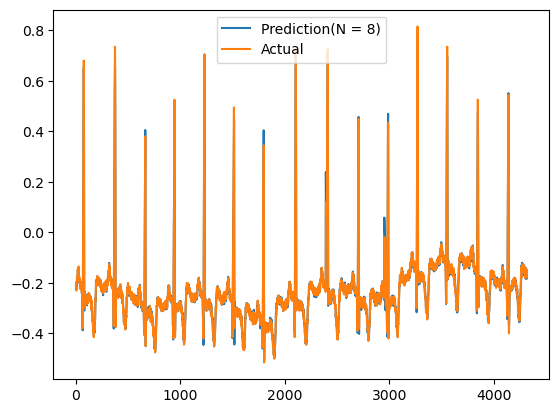

LSTM - Input Vector (N = 8)
R2 =  0.9885977104069269
MAE =  0.008831906656684176
MSE =  0.00020548073683723895
MAPE =  0.06951108322971965
Anomalies: 
 [ 373  664 1221 1232 1509 1512 1516 1797 2391 2392 2393 2403 2408 2409
 2951 2952 2962 2963 2965 2979 2985 3847]
373     0.735
664     0.240
1221   -0.330
1232    0.145
1509    0.250
1512    0.495
1516   -0.380
1797    0.345
2391    0.120
2392    0.120
2393    0.120
2403    0.150
2408    0.600
2409    0.695
2951   -0.020
2952   -0.020
2962   -0.260
2963   -0.240
2965   -0.265
2979   -0.355
2985    0.185
3847    0.525
dtype: float64


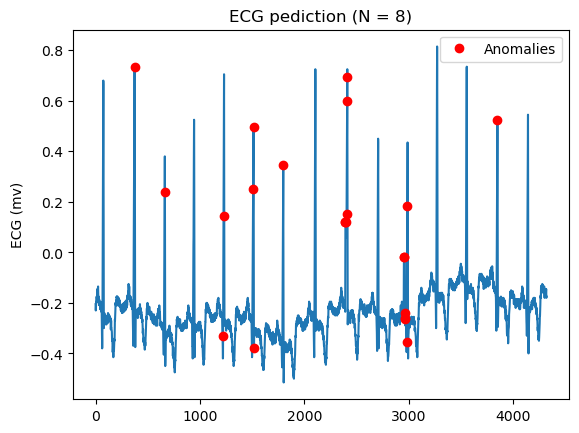

Epoch 1/50


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


540/540 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0103
Epoch 2/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 8.4096e-04
Epoch 3/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 5.6676e-04
Epoch 4/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 5.2288e-04
Epoch 5/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 4.1797e-04
Epoch 6/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 3.4617e-04
Epoch 7/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.0454e-04
Epoch 8/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2.7745e-04
Epoch 9/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 2.8487e-04
Epoch 10/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 2.5174e-04
Epoch 11/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.4835e-04
Epoch 12/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.3197e-04
Epoch 13/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2.1503e-04
Epoch 14/50
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 2.0469e-04
Epoch 15/50


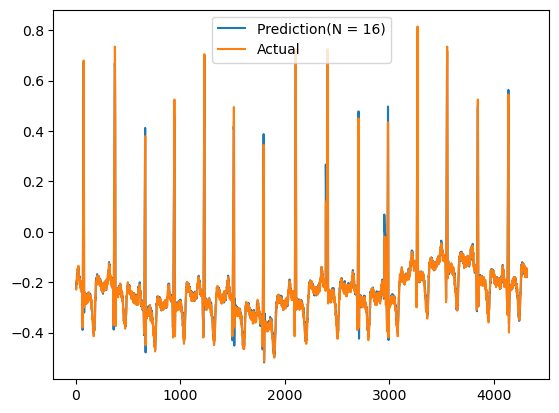

LSTM - Input Vector (N = 16)
R2 =  0.9884547560423934
MAE =  0.008691851140269808
MSE =  0.00021228474831044988
MAPE =  0.4607676180331731
Anomalies: 
 [ 372  663  942 1231 1511 1515 1797 2390 2391 2392 2402 2408 2706 2950
 2951 2961 2966 2967 2968 2969 2970 2986]
372     0.735
663     0.240
942     0.525
1231    0.145
1511    0.495
1515   -0.380
1797    0.170
2390    0.120
2391    0.120
2392    0.120
2402    0.150
2408    0.695
2706    0.220
2950   -0.020
2951   -0.020
2961   -0.260
2966   -0.285
2967   -0.270
2968   -0.250
2969   -0.255
2970   -0.265
2986    0.435
dtype: float64


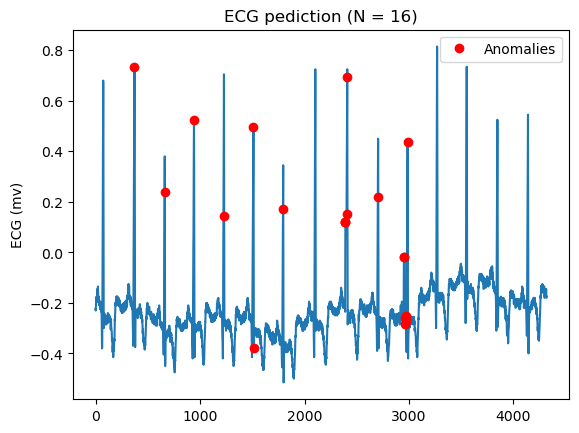

In [208]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


def find_prediction_anomalies(series_predict, series_actual):

    series_err = np.abs(series_actual - series_predict)
    threshold = np.percentile(series_err, 99.5)       # 0.5% error raye
    anomalies = np.where(series_err>threshold)[0]

    print("Anomalies: \n",anomalies)
    return anomalies

def LSTM_prediction(series, input_window_list, output_window, epochs, savefile):
    # Generate data for each input window
    for n in input_window_list:
        # Split data as required
        train_series, test_series = split_data(series, n, output_window, 0.8)

        # Create LSTM
        LSTM = create_LSTM(train_series[0], train_series[1], n, output_window, epochs)

        # Predict out of sample values
        LSTM_Output_Predict = LSTM.predict(test_series[0], verbose=0)

        # plot series
        plt.figure()
        plt.plot(LSTM_Output_Predict, label="Prediction(N = "+ str(n) +")")
        plt.plot(test_series[1], label="Actual")
        #plt.title("LSTM - Prediction vs Expected (N = "+ str(n) +")")
        plt.savefig(f'plots/LSTM_prediction(N = '+ str(n) +').png')
        plt.legend()
        plt.show()

        # Calculate Metrics
        print("LSTM - Input Vector (N = " + str(n) +")")
        print('R2 = ', r2_score(LSTM_Output_Predict, test_series[1]))
        print('MAE = ', mean_absolute_error(LSTM_Output_Predict, test_series[1]))
        print('MSE = ', mean_squared_error(LSTM_Output_Predict, test_series[1]))
        print('MAPE = ', mean_absolute_percentage_error(LSTM_Output_Predict, test_series[1]))

        # Plot Anomalies
        anomalies = Series(find_prediction_anomalies(LSTM_Output_Predict, test_series[1]).reshape(-1))
        test_series_plot = Series(test_series[1][:,0].reshape(-1))

        print(test_series_plot.iloc[anomalies])

        # Plot series with anomalies marked
        test_series_plot.plot.line(title = "ECG Prediction (N = " + str(n) +")")
        plt.plot(anomalies, test_series_plot.iloc[anomalies], 'ro', label = "Anomalies")
        plt.ylabel('ECG (mv)')
        plt.legend()
        plt.savefig(f"plots/{savefile}_{n}.png")
        plt.show()
 

# Create LSTM Models
input_window = [4,8,16]
epochs = 50
output_window = 1 # Univariate

# Run model prediction
LSTM_prediction(series_mlii, input_window, output_window, epochs, "ECG_MLII")
LSTM_prediction(series_v5, input_window, output_window, epochs, "ECG_V5")



In [216]:
import tensorflow as tf

# Use data as Bi-variate

# Convert univariate
# x = {x0,x1,x2}
# y = {y0,y1,y2}
# To Bivariate
# z = {{x0,y0},{x1,y1},{x2,y2}

# Combine both univariate series into bivariate
combined_values = [np.array([x, y], dtype=float) for x, y in zip(series_mlii, series_v5)]
tensor_series = tf.convert_to_tensor(combined_values)

input_window = [4,8,16]
epochs = 50
output_window = 2

# Run model predictions
LSTM_prediction(tensor_series, input_window, output_window, epochs, "ECG_Bivariate")


Epoch 1/50


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Exception encountered when calling LSTMCell.call().

[1mDimensions must be equal, but are 2 and 1 for '{{node sequential_67_1/lstm_67_1/lstm_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_67_1/lstm_67_1/strided_slice_2, sequential_67_1/lstm_67_1/lstm_cell_1/Cast/ReadVariableOp)' with input shapes: [?,2], [1,256].[0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(None, 2), dtype=float32)
  • states=('tf.Tensor(shape=(None, 64), dtype=float32)', 'tf.Tensor(shape=(None, 64), dtype=float32)')
  • training=True